In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
data = pd.read_csv('../train.csv')

In [3]:
data.head()

,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff,blueWins
0,0,5,3,976,1599,-21,2,0.4,1,10,19,1,1,0,0,1
1,1,5,4,780,523,-16,0,-0.2,0,0,12,2,1,0,0,1
2,0,6,14,-4443,-4140,1,0,-1.0,-5,-27,-20,-1,-1,0,0,1
3,0,4,7,-1903,-584,-25,-1,0.0,-8,-10,-17,-1,-1,0,0,0
4,0,5,10,-3731,-1458,10,1,-0.6,-3,-25,-5,-1,-1,0,0,1


In [4]:
X = data.iloc[:, :-1]
y = data['blueWins']

In [5]:
X.shape

(6915, 15)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Standardization
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Feature importances

In [8]:
# use of forests of trees to evaluate the importance of features on an artificial classification task
forest = ExtraTreesClassifier(n_estimators=200,random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [9]:
columns = data.columns[:-1]
columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueGoldDiff',
       'blueExperienceDiff', 'blueWardsPlacedDiff', 'blueWardsDestroyedDiff',
       'blueAvgLevelDiff', 'blueAssistsDiff', 'blueTotalMinionsKilledDiff',
       'blueTotalJungleMinionsKilledDiff', 'blueEliteMonstersDiff',
       'blueDragonsDiff', 'blueHeraldsDiff', 'blueTowersDestroyedDiff'],
      dtype='object')

In [10]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))

1. feature blueGoldDiff (0.129797)
2. feature blueExperienceDiff (0.121670)
3. feature blueAvgLevelDiff (0.087944)
4. feature blueAssistsDiff (0.085831)
5. feature blueDeaths (0.082185)
6. feature blueTotalMinionsKilledDiff (0.079467)
7. feature blueKills (0.078096)
8. feature blueTotalJungleMinionsKilledDiff (0.072183)
9. feature blueWardsPlacedDiff (0.067786)
10. feature blueWardsDestroyedDiff (0.065257)
11. feature blueEliteMonstersDiff (0.042382)
12. feature blueDragonsDiff (0.033358)
13. feature blueFirstBlood (0.028509)
14. feature blueTowersDestroyedDiff (0.014306)
15. feature blueHeraldsDiff (0.011229)


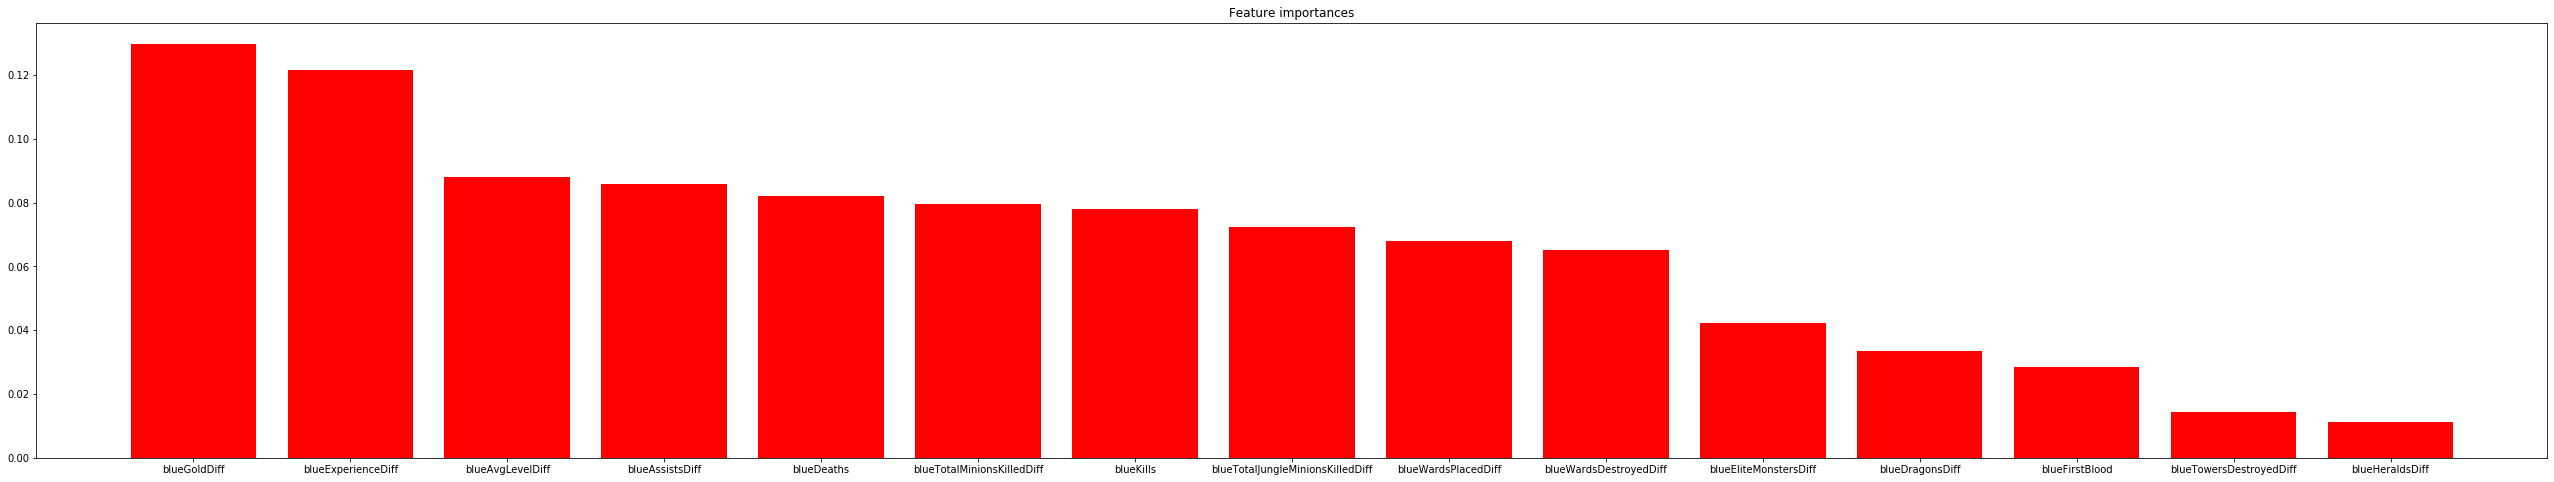

In [11]:
# Plot the feature importances of the forest
plt.figure(figsize=(45,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


In [12]:
forest = ExtraTreesClassifier(n_estimators=200,random_state=42)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [13]:
#Standardization did not effect importances
for f in range(X_train_std.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))

1. feature blueGoldDiff (0.129797)
2. feature blueExperienceDiff (0.121670)
3. feature blueAvgLevelDiff (0.087944)
4. feature blueAssistsDiff (0.085831)
5. feature blueDeaths (0.082185)
6. feature blueTotalMinionsKilledDiff (0.079467)
7. feature blueKills (0.078096)
8. feature blueTotalJungleMinionsKilledDiff (0.072183)
9. feature blueWardsPlacedDiff (0.067786)
10. feature blueWardsDestroyedDiff (0.065257)
11. feature blueEliteMonstersDiff (0.042382)
12. feature blueDragonsDiff (0.033358)
13. feature blueFirstBlood (0.028509)
14. feature blueTowersDestroyedDiff (0.014306)
15. feature blueHeraldsDiff (0.011229)


# Perceptron

In [14]:
ppn = Perceptron(random_state=42)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 567
Accuracy: 0.727


In [15]:
# test with stardeartion
ppn = Perceptron(random_state=42)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Misclassified examples: 726
Accuracy: 0.650


# LogisticRegression

In [16]:
lr = LogisticRegression(solver = 'saga', max_iter = 10000)
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(classification_report(y_test, pred))
print('Misclassified examples: %d' % (y_test != pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1040
           1       0.72      0.75      0.73      1035

    accuracy                           0.73      2075
   macro avg       0.73      0.73      0.73      2075
weighted avg       0.73      0.73      0.73      2075

Misclassified examples: 566
Accuracy: 0.727


In [17]:
lr = LogisticRegression(solver = 'saga', max_iter = 10000)
lr.fit(X_train_std,y_train)
pred = lr.predict(X_test_std)
print(classification_report(y_test, pred))
print('Misclassified examples: %d' % (y_test != pred).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1040
           1       0.70      0.74      0.72      1035

    accuracy                           0.71      2075
   macro avg       0.72      0.71      0.71      2075
weighted avg       0.72      0.71      0.71      2075

Misclassified examples: 592
Accuracy: 0.715
